Kernel methods are a class of algorithms used for pattern recognition, regression, and classification. In the context of classification, kernel methods perform non-linear transformation on the input data and map it into a high-dimensional feature space where a linear boundary can be drawn to separate the classes.

Some of the popular kernel methods for classification are:

1. Support Vector Machines (SVM): SVM is a widely used kernel-based classification algorithm that finds the hyperplane with the maximum margin to separate the classes. It uses the kernel trick to transform the input data into a high-dimensional space.

2. Gaussian Process Classification (GPC): GPC is a probabilistic framework for classification that models the distribution of the class labels for each input. It uses a Gaussian process as the prior on the function mapping inputs to outputs.

3. k-Nearest Neighbors (k-NN): k-NN is a simple and widely used classification algorithm that assigns a class label to a test sample based on the majority vote of its k-nearest neighbors in the feature space. The kernel trick can be used to perform non-linear transformation on the input data.

4. Radial Basis Function (RBF) Network: RBF network is a type of neural network that uses radial basis functions as the activation functions of its hidden neurons. It has been widely used for non-linear classification problems.

5. Kernel Discriminant Analysis (KDA): KDA is a dimensionality reduction technique that projects the data into a lower-dimensional space while preserving the class separability. It can be used for both linear and non-linear classification.

# 1. SVM Classifier

Support Vector Machine (SVM) is a type of machine learning algorithm used for classification and regression analysis. In layman's terms, it is a tool used to sort data into different categories based on certain characteristics.

Imagine you have a dataset with points that belong to two different categories, and you want to separate these categories with a line. SVM finds the line that best separates the categories, called the "decision boundary," by maximizing the distance between the closest data points from each category to the line. These closest data points are called "support vectors."

SVM can also be used for non-linear classification by transforming the data into a higher dimensional space, where a linear decision boundary can be found. The algorithm then maps the results back to the original space to make predictions.

In summary, SVM is a way to automatically categorize data into groups based on their characteristics, and is particularly useful when dealing with complex or non-linear relationships between the variables.

## 1.1 Simulated Data

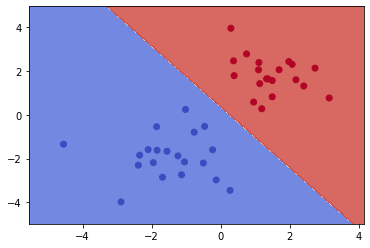

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate random data
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# Fit SVM to the data
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# Get the range of the data
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Generate a grid of data points for plotting
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Get the predictions for all the points in the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data points and decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
plt.show()

This code will generate a scatter plot showing the two classes of data points, with different colors for each class, and the decision boundary that separates the classes. The boundary is shown as a contour plot, with different colors indicating the predicted class for each point in the grid

# 1.2 Iris Dataset

In [37]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

# Load the iris dataset
iris = datasets.load_iris()

# Create a DataFrame with the features
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

# Split the data into training and test sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train the SVM model
clf = svm.SVC(kernel='linear', C=1, random_state=0,probability=True )
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [42]:
probs = clf.predict_proba(X_test)
df_probs=pd.DataFrame(probs, columns='Class_0 CLass_1 Class_2'.split())
df_probs['Category']=y_test.values
df_probs

,Class_0,CLass_1,Class_2,Category
0,0.013470,0.005575,0.980955,2.0
1,0.011449,0.981337,0.007213,1.0
2,0.980655,0.010528,0.008817,0.0
3,0.004034,0.003677,0.992289,2.0
4,0.955230,0.029909,0.014862,0.0
5,0.004315,0.000312,0.995373,2.0
6,0.969264,0.019329,0.011407,0.0
7,0.005608,0.943272,0.051120,1.0
8,0.005210,0.913409,0.081381,1.0
9,0.016020,0.976920,0.007060,1.0


## 1.3 GridsearchCV

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Create a SVM classifier object
svc = SVC()

# Create a GridSearchCV object
grid = GridSearchCV(svc, param_grid, verbose=3)

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Get the best parameters and best score from GridSearchCV
best_params = grid.best_params_
best_score = grid.best_score_

# Use the best parameters to make predictions on the test set
y_pred = grid.predict(X_test)


Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.958 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.958 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.958 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.875 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.958 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.958 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.958 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.958 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

[CV 1/5] END .........C=1, gamma=1, kernel=poly;, score=0.958 total time=   0.0s
[CV 2/5] END .........C=1, gamma=1, kernel=poly;, score=0.917 total time=   0.0s
[CV 3/5] END .........C=1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5] END .........C=1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5] END .........C=1, gamma=1, kernel=poly;, score=0.875 total time=   0.0s
[CV 1/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.375 total time=   0.0s
[CV 2/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.375 total time=   0.0s
[CV 3/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.375 total time=   0.0s
[CV 4/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.375 total time=   0.0s
[CV 5/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.333 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.958 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.917 total time=   0.0s
[CV 3/5] END .....C=1, gamma

[CV 3/5] END ........C=10, gamma=1, kernel=poly;, score=1.000 total time=   0.3s
[CV 4/5] END ........C=10, gamma=1, kernel=poly;, score=1.000 total time=   0.2s
[CV 5/5] END ........C=10, gamma=1, kernel=poly;, score=0.750 total time=   0.2s
[CV 1/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.375 total time=   0.0s
[CV 2/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.375 total time=   0.0s
[CV 3/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.375 total time=   0.0s
[CV 4/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.375 total time=   0.0s
[CV 5/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.333 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.958 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.958 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ....C=10, gamma

[CV 5/5] END .......C=100, gamma=1, kernel=poly;, score=0.750 total time=   0.1s
[CV 1/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.375 total time=   0.0s
[CV 2/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.375 total time=   0.0s
[CV 3/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.375 total time=   0.0s
[CV 4/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.375 total time=   0.0s
[CV 5/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.333 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.958 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.958 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.958 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.875 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 2/5] END ......C=100, ga

In this example, param_grid defines the possible combinations of parameters for SVC, including the values for C, gamma, and kernel. The GridSearchCV object is created with these parameters and then fit to the training data using the fit method. The best parameters and best score are obtained using the best_params_ and best_score_ attributes of the GridSearchCV object, respectively. Finally, the results are plotted as a function of the C parameter using the cv_results_ attribute of the GridSearchCV object.

In [8]:
# Print the best parameters and best score
print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score: 0.9583333333333334


- C: This parameter controls the trade-off between achieving a low training error and a low testing error. A smaller value of C results in a wider margin and a larger number of misclassified training examples, while a larger value of C results in a narrower margin with fewer misclassified training examples.

- kernel: This parameter specifies the type of kernel to be used in the decision function. Commonly used kernels include linear, polynomial, radial basis function (RBF), and sigmoid.

- gamma: This parameter controls the shape of the decision boundary in non-linear SVMs. A smaller value of gamma results in a wider boundary, while a larger value results in a narrower boundary.

- degree: This parameter is only applicable when the polynomial kernel is used, and it controls the degree of the polynomial used in the decision function.

- coef0: This parameter is only applicable for polynomial and sigmoid kernels, and it controls the value of the independent term in the kernel function.

- shrinking: This parameter determines whether to use the shrinking heuristics in the optimization algorithm.

- probability: This parameter determines whether to enable probability estimates for SVM algorithms.

- tol: This parameter sets the tolerance for stopping criterion in the optimization algorithm.

# 2. GPC

**A Gaussian Process Classifier (GPC) is a machine learning algorithm used for classification problems. It is a probabilistic approach to classification, which means that it can provide not only a class label for a given input data, but also an estimate of the uncertainty associated with the prediction.**

Imagine you have a collection of colored marbles. You want to use these marbles to train a classifier to distinguish between red and blue marbles. A GPC would use the positions and colors of the marbles to build a probabilistic model of the relationship between the two variables. This model would then be used to make predictions about the color of new marbles, based on their positions. In addition to providing a prediction of the class label, the GPC would also give a measure of uncertainty for that prediction.

# 2.1 Simulated Data

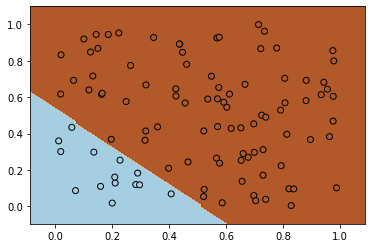

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Generate some simulated data
np.random.seed(0)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 0.5).astype(int)

# Train a GPC on the simulated data
kernel = 1.0 * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0)
gpc.fit(X, y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = gpc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.show()

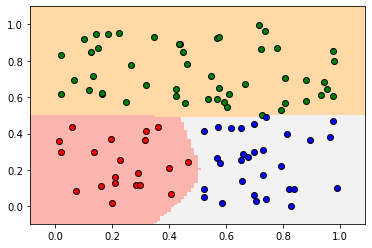

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Generate sample data
np.random.seed(0)
X = np.random.rand(100, 2)
y = (X[:, 0] > 0.5).astype(int)
y[np.logical_and(X[:, 1] > 0.5, y == 0)] = 1
y[np.logical_and(X[:, 1] < 0.5, y == 1)] = 2

# Fit Gaussian process classifier
kernel = 1.0 * RBF([1.0, 1.0])
gpc = GaussianProcessClassifier(kernel=kernel, warm_start=True).fit(X, y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = gpc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

# Plot the training points
colors = ['r', 'g', 'b']
for class_id, color in enumerate(colors):
    indices = np.where(y == class_id)
    plt.scatter(X[indices, 0], X[indices, 1], c=color, edgecolors='k')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

# 2.2 Iris Dataset

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
X = iris['data']
y = iris['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a GPC on the training data
kernel = 1.0 * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0)
gpc.fit(X_train, y_train)

# Evaluate the accuracy on the testing data
accuracy = gpc.score(X_test, y_test)
print('Accuracy: {:.2f}%'.format(accuracy * 100))


Accuracy: 100.00%


In [45]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
probs = gpc.predict_proba(X_test)
df_probs=pd.DataFrame(probs, columns='Class_0 CLass_1 Class_2'.split())
df_probs['Category']=y_test
df_probs

,Class_0,CLass_1,Class_2,Category
0,0.194198,0.011322,0.794480,2
1,0.178787,0.808399,0.012814,1
2,0.774876,0.095744,0.129379,0
3,0.239606,0.055507,0.704887,2
4,0.828953,0.041842,0.129205,0
5,0.229516,0.015535,0.754949,2
6,0.821391,0.033659,0.144950,0
7,0.214421,0.746678,0.038901,1
8,0.211555,0.734667,0.053779,1
9,0.181817,0.811099,0.007084,1


## 2.3 Gridsearch 

In [54]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Load the iris dataset
iris = load_iris()
X = iris["data"]
y = iris["target"]

# Create the Gaussian process classifier
gpc = GaussianProcessClassifier(kernel=RBF(length_scale=1.0))

# Define the parameter grid to search over
param_grid = {'kernel__length_scale': np.logspace(-3, 3, 7),
              'kernel__length_scale_bounds': [(0.001, 10.0)]
              }

# Perform grid search cross-validation
grid_search = GridSearchCV(gpc, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best parameters and accuracy score
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarni

Best parameters:  {'kernel__length_scale': 0.1, 'kernel__length_scale_bounds': (0.001, 10.0)}
Best accuracy:  0.9666666666666668
